In [26]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


 
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")
train.shape
test.shape
# PassengerId – 乗客識別ユニークID
# Survived – 生存フラグ（0=死亡、1=生存）
# Pclass – チケットクラス
# Name – 乗客の名前
# Sex – 性別（male=男性、female＝女性）
# Age – 年齢
# SibSp – タイタニックに同乗している兄弟/配偶者の数
# parch – タイタニックに同乗している親/子供の数
# ticket – チケット番号
# fare – 料金
# cabin – 客室番号
# Embarked – 出港地（タイタニックへ乗った港）

(418, 11)

In [27]:
train_x = train.drop(["Survived", "Name", "Cabin", "Ticket", "PassengerId"], axis=1)
test_x = test.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1)
train_y = train["Survived"]


# 欠損値を年齢の中央値。出港地は最多のSで補完
train_x["Age"] = train_x["Age"].fillna(train_x["Age"].median())
train_x["Embarked"] = train_x["Embarked"].fillna("S")

test_x["Age"] = test_x["Age"].fillna(test_x["Age"].median())
test_x["Fare"] = test_x["Fare"].fillna(test_x["Fare"].median())
test_x["Embarked"] = test_x["Embarked"].fillna("S")


train_x_dummy = pd.get_dummies(train_x,columns=["Sex","Embarked"])
test_x_dummy = pd.get_dummies(test_x,columns=["Sex","Embarked"])

X_train, X_test, y_train, y_test = train_test_split(train_x_dummy, train_y, test_size=0.3, random_state=101)

In [6]:
# ・線形回帰で分類可能か
# ・標準かの意味＿回帰のような大きな数字に対して有効？
# ・評価方法、比較
# ・probaは分類のみか
# ・# 混同行列（confusion matrix）
# # 正解率（accuracy）
# # 適合率（precision）
# # 再現率（recall）
# # F1スコア（F1-score）
# # AUC（曲線下面積）
# 評価として大事なのは
# https://qiita.com/kazuki_hayakawa/items/18b7017da9a6f73eba77
#     過学習の評価の謎

In [14]:
from sklearn.svm import SVC


svc = SVC(probability=True)
svc.fit(X_train, y_train)

predictions = svc.predict(X_test) 
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

In [15]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1行1列目の要素は、実際にクラス0で正しくクラス0に分類されたデータ数（真陰性（TN: True Negative））
# 1行2列目の要素は、実際にはクラス0だが誤ってクラス1に分類されたデータ数（偽陽性（FP: False Positive））
# 2行1列目の要素は、実際にはクラス1だが誤ってクラス0に分類されたデータ数（偽陰性（FN: False Negative））
# 2行2列目の要素は、実際にクラス1で正しくクラス1に分類されたデータ数（真陽性（TP: True Positive））

# 混同行列（confusion matrix）
# 正解率（accuracy）
# 適合率（precision）
# 再現率（recall）
# F1スコア（F1-score）
# AUC（曲線下面積）


print('confusion matrix = \n', confusion_matrix(y_test, predictions))
print('accuracy = ', accuracy_score(y_test, predictions))
print('precision = ', precision_score(y_test, predictions))
print('recall = ', recall_score(y_test, predictions))
print('f1 score = ', f1_score(y_test, predictions))

confusion matrix = 
 [[143  11]
 [ 82  32]]
accuracy =  0.6529850746268657
precision =  0.7441860465116279
recall =  0.2807017543859649
f1 score =  0.4076433121019108


In [22]:
y_proba = svc.predict_proba(X_test)[: , 1]
print(y_proba.shape)

(268,)


AUC curve : 0.780816
accuracy: 0.6529850746268657
f1_score: 0.4076433121019108


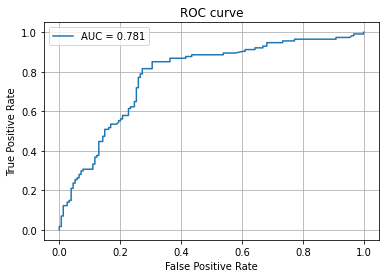

In [25]:
from sklearn.metrics import (roc_curve, auc, accuracy_score) 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


# AUCスコアを出す
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)


auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print('accuracy:',accuracy_score(y_test, predictions))
print('f1_score:',f1_score(y_test, predictions))